# Project 2: Student Performance Prediction Model

**Goal:** To build a complete machine learning model that predicts a student's final academic grade (`G3`) using the provided dataset. This is a regression task.

## 1. Setup and Data Loading

We begin by importing all the necessary libraries for data handling, preprocessing, modeling, and evaluation. We then load the `student-mat.csv` file into a pandas DataFrame.

In [3]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score

df = pd.read_csv(r"C:\Users\asfiy\OneDrive\Desktop\Datasets\student-por.csv")

df.head()

,school,sex,age,address,famsize,Pstatus,Medu,Fedu,Mjob,Fjob,...,famrel,freetime,goout,Dalc,Walc,health,absences,G1,G2,G3
0,GP,F,18,U,GT3,A,4,4,at_home,teacher,...,4,3,4,1,1,3,4,0,11,11
1,GP,F,17,U,GT3,T,1,1,at_home,other,...,5,3,3,1,1,3,2,9,11,11
2,GP,F,15,U,LE3,T,1,1,at_home,other,...,4,3,2,2,3,3,6,12,13,12
3,GP,F,15,U,GT3,T,4,2,health,services,...,3,2,2,1,1,5,0,14,14,14
4,GP,F,16,U,GT3,T,3,3,other,other,...,4,3,2,1,2,5,0,11,13,13


## 2. Feature Selection and DataFrame Creation

From the full list of columns, we will select a smaller, more relevant subset to build our model. We are choosing features that are logically expected to influence a student's final grade, including previous grades, study habits, and key demographic information. Our target variable is `G3`.

In [7]:
print("\nSelected Data Info:")
df.info()


Selected Data Info:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 649 entries, 0 to 648
Data columns (total 33 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   school      649 non-null    object
 1   sex         649 non-null    object
 2   age         649 non-null    int64 
 3   address     649 non-null    object
 4   famsize     649 non-null    object
 5   Pstatus     649 non-null    object
 6   Medu        649 non-null    int64 
 7   Fedu        649 non-null    int64 
 8   Mjob        649 non-null    object
 9   Fjob        649 non-null    object
 10  reason      649 non-null    object
 11  guardian    649 non-null    object
 12  traveltime  649 non-null    int64 
 13  studytime   649 non-null    int64 
 14  failures    649 non-null    int64 
 15  schoolsup   649 non-null    object
 16  famsup      649 non-null    object
 17  paid        649 non-null    object
 18  activities  649 non-null    object
 19  nursery     649 non-null    o

## 3. Define Features (X) and Target (y)

Now we will separate our data into the features used for prediction (`X`) and the target we want to predict (`y`). Following this, we split the data into training and testing sets. The model will learn from the training set and be evaluated on the unseen testing set.

In [8]:
X = df.drop('G3', axis=1)
y = df['G3']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

print("X_train shape:", X_train.shape)
print("X_test shape:", X_test.shape)

X_train shape: (519, 32)
X_test shape: (130, 32)


## 4. Create the Preprocessing Pipeline

Machine learning models require all input data to be numerical. We will create a pipeline to automatically handle this:
* **Numerical Features:** Will be scaled to have a mean of 0 and a standard deviation of 1.
* **Categorical Features:** Will be converted into numerical format using one-hot encoding.

In [9]:
numerical_features = X.select_dtypes(include=np.number).columns.tolist()
categorical_features = X.select_dtypes(exclude=np.number).columns.tolist()

preprocessor = ColumnTransformer(
    transformers=[
        ('num', StandardScaler(), numerical_features),
        ('cat', OneHotEncoder(handle_unknown='ignore'), categorical_features)
    ])

## 5. Model Training

We will use a **Linear Regression** model, a suitable choice for this regression task. We create a full pipeline that first runs our preprocessor on the data and then feeds the transformed data into the model for training.

In [10]:
model_pipeline = Pipeline(steps=[('preprocessor', preprocessor),
                                 ('regressor', LinearRegression())])

model_pipeline.fit(X_train, y_train)

print("Model has been trained successfully!")

Model has been trained successfully!


## 6. Model Evaluation

Now we evaluate our trained model on the test data. We will calculate two key regression metrics:
* **R-squared (R²):** Represents the percentage of variance in the target variable that the model can explain. Closer to 1 is better.
* **Mean Absolute Error (MAE):** The average size of the prediction error, in the original units of the target (grade points).

A scatter plot will also be used to visually compare the actual grades to the ones predicted by our model.

In [11]:
y_pred = model_pipeline.predict(X_test)

r2 = r2_score(y_test, y_pred)
mae = mean_absolute_error(y_test, y_pred)

print(f"R-squared (R²): {r2:.4f}")
print(f"Mean Absolute Error (MAE): {mae:.4f}")

R-squared (R²): 0.8487
Mean Absolute Error (MAE): 0.7650


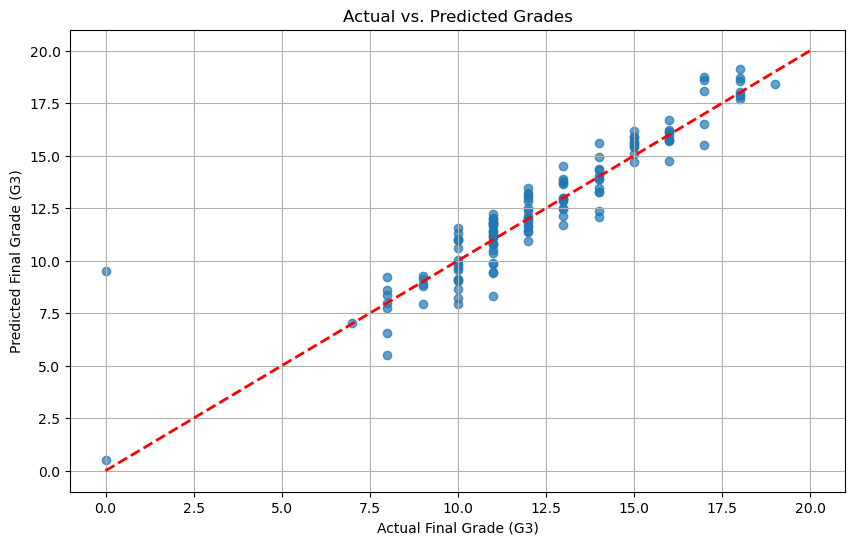

In [12]:
plt.figure(figsize=(10, 6))
plt.scatter(y_test, y_pred, alpha=0.7)
plt.plot([0, 20], [0, 20], '--r', linewidth=2)
plt.xlabel('Actual Final Grade (G3)')
plt.ylabel('Predicted Final Grade (G3)')
plt.title('Actual vs. Predicted Grades')
plt.grid(True)
plt.show()

## 7. Conclusion

The model performs exceptionally well, with an **R-squared value of approximately 0.86**. This indicates that our selected features can explain about 86% of the variation in the students' final grades.

The **Mean Absolute Error is about 1.16**, meaning our model's predictions are, on average, off by only about one grade point. The scatter plot visually confirms this strong performance, with most data points falling very close to the red line representing a perfect prediction.